In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from funpymodeling.exploratory import freq_tbl


In [ ]:
df=pd.read_csv("Datos_limpios_Mexico.csv")
df.head(5)

,Unnamed: 0,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,12/09/24,--,Inishowen Artists' Retreat,A beautiful 1800s Irish cottage with a working...,Andy,21/11/18,"Trenbane, Ireland","Ageing hippy, trained as aerospace engineer wh...",within an hour,...,2.0,4.98,4.95,4.95,4.95,4.98,4.90,4.98,1.0,2.35
1,1,12/09/24,--,Cottage within the grounds Rathmullan House Hotel,Your best option to stay if you want to visit ...,Travelnest,05/01/22,"Mexico City, Mexico","Hello, we are the Travelnest Team and we offer...",within an hour,...,0.0,5.00,5.00,4.95,4.95,5.00,4.85,4.90,1.8,0.84
2,2,11/09/24,--,Melmore Crest,Welcome to your secluded luxury retreat by the...,Kai,10/12/15,"Gremersdorf, Germany",Hello! I am the owner of the house but live in...,within a few hours,...,1.0,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.0,1.32
3,3,11/09/24,--,Fairway Haven,Fairway Haven is located close to Dunfanaghy G...,Jack,01/07/23,"Lifford, Ireland","I am a social person, who likes to provide the...",within an hour,...,1.0,4.83,5.00,4.50,4.83,5.00,4.67,5.00,1.0,0.44
4,4,11/09/24,--,Spacious Dublin City Apartment,Presenting our extremely spacious and comforta...,Denis,29/03/17,"Mexico City, Mexico","I am a social person, who likes to provide the...",within a day,...,0.0,4.90,4.90,4.80,5.00,5.00,4.90,4.70,1.0,1.10


In [4]:
#Nuevo dataframe para la varible room type
df_2 = df[['room_type', 'price']].copy()
df_2

,room_type,price
0,Entire home/apt,125.0
1,Entire home/apt,250.0
2,Entire home/apt,131.7
3,Entire home/apt,140.0
4,Entire home/apt,130.0
...,...,...
30638,Private room,111.0
30639,Private room,124.0
30640,Entire home/apt,220.0
30641,Entire home/apt,200.0


In [5]:
# Eliminamos el símbolo "$" y convertimos a números usando una función lambda ela columna de price
df_2['price'] = df_2['price'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
df_2.head(5)

,room_type,price
0,Entire home/apt,125.0
1,Entire home/apt,250.0
2,Entire home/apt,131.7
3,Entire home/apt,140.0
4,Entire home/apt,130.0


In [6]:
#Reemplazar valores nulos
df_2['price'].fillna(df_2['price'].mean(), inplace=True)
df_2

/var/folders/cz/7wvs0p453l9_tw6cq3z5z51h0000gn/T/ipykernel_18996/435592605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['price'].fillna(df_2['price'].mean(), inplace=True)


,room_type,price
0,Entire home/apt,125.0
1,Entire home/apt,250.0
2,Entire home/apt,131.7
3,Entire home/apt,140.0
4,Entire home/apt,130.0
...,...,...
30638,Private room,111.0
30639,Private room,124.0
30640,Entire home/apt,220.0
30641,Entire home/apt,200.0


In [7]:
#Convertir a numeros enteros
df_2['price'] = df_2['price'].astype(int)
df_2


,room_type,price
0,Entire home/apt,125
1,Entire home/apt,250
2,Entire home/apt,131
3,Entire home/apt,140
4,Entire home/apt,130
...,...,...
30638,Private room,111
30639,Private room,124
30640,Entire home/apt,220
30641,Entire home/apt,200


In [8]:
#Obtengo un ánalisis univariado de la varible room_type
table1 = freq_tbl(df_2['room_type'])
table1

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,20226,0.660053,0.660053
1,Private room,10041,0.327677,0.987730
2,Shared room,246,0.008028,0.995758
3,Hotel room,130,0.004242,1.000000


In [9]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table1_2 = table1.drop(['percentage', 'cumulative_perc', 'frequency'], axis=1)
table1_2

,room_type
0,Entire home/apt
1,Private room
2,Shared room
3,Hotel room


In [10]:
#Ajusto el índice de mi dataframe
Filtro_index1 = table1_2.set_index('room_type')
Filtro_index1

""
room_type
Entire home/apt
Private room
Shared room
Hotel room


In [11]:
#Creamos un dataframe para cada valor de room type
entire_home_apt = df_2[df_2['room_type'] == 'Entire home/apt'].copy()
private_room = df_2[df_2['room_type'] == 'Private room'].copy()
shared_room = df_2[df_2['room_type'] == 'Shared room'].copy()
hotel_room = df_2[df_2['room_type'] == 'Hotel room'].copy()

In [12]:
#Visualizamos cada data frame para aseguarnoes de que sea correcto
entire_home_apt

,room_type,price
0,Entire home/apt,125
1,Entire home/apt,250
2,Entire home/apt,131
3,Entire home/apt,140
4,Entire home/apt,130
...,...,...
30634,Entire home/apt,90
30636,Entire home/apt,150
30640,Entire home/apt,220
30641,Entire home/apt,200


In [13]:
private_room

,room_type,price
5,Private room,130
14,Private room,111
15,Private room,160
16,Private room,130
17,Private room,169
...,...,...
30633,Private room,85
30635,Private room,89
30637,Private room,100
30638,Private room,111


In [14]:
shared_room

,room_type,price
13,Shared room,23
26,Shared room,240
53,Shared room,130
65,Shared room,130
79,Shared room,130
...,...,...
29578,Shared room,27
29592,Shared room,29
29600,Shared room,45
29602,Shared room,22


In [15]:
hotel_room

,room_type,price
276,Hotel room,150
572,Hotel room,110
722,Hotel room,100
755,Hotel room,99
784,Hotel room,99
...,...,...
28954,Hotel room,131
28967,Hotel room,229
29351,Hotel room,206
29438,Hotel room,62


Ahora creamos las categoari/intervalos para la variable de price


In [16]:
#Nuevo un nuevo dataframe para price 
df_3 = df_2[['price']].copy()
df_3

,price
0,125
1,250
2,131
3,140
4,130
...,...
30638,111
30639,124
30640,220
30641,200


In [17]:
#Calculamos el numero totak de la poblacion "n"
df_3['price'].info()
n= 25080

<class 'pandas.core.series.Series'>
RangeIndex: 30643 entries, 0 to 30642
Series name: price
Non-Null Count  Dtype
--------------  -----
30643 non-null  int64
dtypes: int64(1)
memory usage: 239.5 KB


In [18]:
#calcular maximo y minimo
df_3= df_3.dropna(subset=['price'])
df_3['price'] = df_3['price'].replace({'\$': '', ',': ''}, regex=True)
df_3['price'] = pd.to_numeric(df_3['price'], errors='coerce')
Max = df_3['price'].max()
Min = df_3['price'].min()
Limites = [Max, Min]
Limites

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/cz/7wvs0p453l9_tw6cq3z5z51h0000gn/T/ipykernel_18996/3957770372.py:3: SyntaxWarning: invalid escape sequence '\$'
  df_3['price'] = df_3['price'].replace({'\$': '', ',': ''}, regex=True)


[287, 0]

In [19]:
#Rango
R=Max-Min
R

287

In [20]:
#Calculamos la regla  de sturges
ni=1+3.32*np.log10(n)
ni

15.605767406766812

In [21]:
#Categorización de variables
intervalos=np.linspace(Min, Max, 7)
intervalos

array([  0.        ,  47.83333333,  95.66666667, 143.5       ,
       191.33333333, 239.16666667, 287.        ])

In [23]:
#Creamos categorias
categorias=["0-166.4", "166.5-332", "333-499.4", "499.5-665", "666-832.4", "832.5-999" ]

In [24]:
intervalos = sorted(intervalos)
print("Intervalos:", intervalos)
df_3['price']=pd.cut(x=df_3['price'], bins=intervalos, labels=categorias)
df_3['price']

Intervalos: [0.0, 47.833333333333336, 95.66666666666667, 143.5, 191.33333333333334, 239.16666666666669, 287.0]


0        333-499.4
1        832.5-999
2        333-499.4
3        333-499.4
4        333-499.4
           ...    
30638    333-499.4
30639    333-499.4
30640    666-832.4
30641    666-832.4
30642    333-499.4
Name: price, Length: 30643, dtype: category
Categories (6, object): ['0-166.4' < '166.5-332' < '333-499.4' < '499.5-665' < '666-832.4' < '832.5-999']

In [25]:
#Obtengo un ánalisis univariado de una variable en específico
table2 = freq_tbl(df_3['price'])
table2

,price,frequency,percentage,cumulative_perc
0,333-499.4,15602,0.509154,0.509170
1,166.5-332,6157,0.200927,0.710104
2,499.5-665,4585,0.149626,0.859735
3,666-832.4,2359,0.076983,0.936721
4,832.5-999,1369,0.044676,0.981398
5,0-166.4,570,0.018601,1.000000


In [26]:
#Eliminar las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table2_2= table2.drop(['percentage','cumulative_perc'], axis=1)
table2_2

,price,frequency
0,333-499.4,15602
1,166.5-332,6157
2,499.5-665,4585
3,666-832.4,2359
4,832.5-999,1369
5,0-166.4,570


In [27]:
#Obtengo un filtro de los valores más relevantes de lass variables categoricas seleccionadas
filtro2= table2_2[table2_2['frequency']>0]
filtro2

,price,frequency
0,333-499.4,15602
1,166.5-332,6157
2,499.5-665,4585
3,666-832.4,2359
4,832.5-999,1369
5,0-166.4,570


In [28]:
#Convertir categorica a indice
Filtro_index1=filtro2.set_index('price')
Filtro_index1

,frequency
price,
333-499.4,15602
166.5-332,6157
499.5-665,4585
666-832.4,2359
832.5-999,1369
0-166.4,570


In [29]:
categorias = ["0-166.4", "166.5-332", "333-499.4", "499.5-665", "666-832.4", "832.5-999"]
print(len(categorias))  # Debería ser 6 si intervalos tiene 7 valores

6


In [30]:
df_encoded = pd.get_dummies(df_3, columns=['price'], drop_first=True)
df_encoded

,price_166.5-332,price_333-499.4,price_499.5-665,price_666-832.4,price_832.5-999
0,False,True,False,False,False
1,False,False,False,False,True
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
30638,False,True,False,False,False
30639,False,True,False,False,False
30640,False,False,False,True,False
30641,False,False,False,True,False


In [31]:
# Crear un DataFrame para cada columna creada
categorias_unicas = df_3['price'].unique()
print(categorias_unicas)

['333-499.4', '832.5-999', '499.5-665', '166.5-332', '666-832.4', '0-166.4', NaN]
Categories (6, object): ['0-166.4' < '166.5-332' < '333-499.4' < '499.5-665' < '666-832.4' < '832.5-999']


In [32]:
# Crear un diccionario para almacenar los DataFrames de cada categoría
dataframes_por_categoria = {}

# Iterar sobre cada categoría única
for categoria in categorias_unicas:
    # Filtrar el DataFrame para la categoría actual
    dataframes_por_categoria[categoria] = df_3[df_3['price'] == categoria]

In [33]:
# Acceder al DataFrame para la categoría '0-166.4'
df_0_166_4 = dataframes_por_categoria['0-166.4']
df_0_166_4



,price
13,0-166.4
527,0-166.4
675,0-166.4
744,0-166.4
749,0-166.4
...,...
29977,0-166.4
30065,0-166.4
30217,0-166.4
30273,0-166.4


In [34]:
df_166_5_332=dataframes_por_categoria['166.5-332']
df_166_5_332

,price
8,166.5-332
142,166.5-332
165,166.5-332
168,166.5-332
203,166.5-332
...,...
30586,166.5-332
30613,166.5-332
30633,166.5-332
30634,166.5-332


In [35]:
df_333_499_4=dataframes_por_categoria['333-499.4']
df_333_499_4

,price
0,333-499.4
2,333-499.4
3,333-499.4
4,333-499.4
5,333-499.4
...,...
30631,333-499.4
30637,333-499.4
30638,333-499.4
30639,333-499.4


In [36]:
df_499_5_665=dataframes_por_categoria['499.5-665']
df_499_5_665

,price
6,499.5-665
7,499.5-665
10,499.5-665
15,499.5-665
17,499.5-665
...,...
30620,499.5-665
30623,499.5-665
30628,499.5-665
30630,499.5-665


room type vs price

In [37]:
df_666_832_4=dataframes_por_categoria['666-832.4']
df_666_832_4

,price
11,666-832.4
12,666-832.4
27,666-832.4
128,666-832.4
157,666-832.4
...,...
30621,666-832.4
30629,666-832.4
30632,666-832.4
30640,666-832.4


In [38]:
df_832_5_999=dataframes_por_categoria['832.5-999']
df_832_5_999

,price
1,832.5-999
26,832.5-999
202,832.5-999
257,832.5-999
295,832.5-999
...,...
30583,832.5-999
30591,832.5-999
30610,832.5-999
30612,832.5-999


In [39]:
# Asignar un valor numérico al intervalo 83-234
df_0_166_4['price_numerico'] = 200

# Asignar un valor numérico al intervalo 0-100 (si tienes un DataFrame para este intervalo)
df_166_5_332['price_numerico'] = 311

# Asignar un valor numérico al intervalo 846-1000
df_333_499_4['price_numerico'] = 464

# Asignar un valor numérico al intervalo 0-100 (si tienes un DataFrame para este intervalo)
df_499_5_665['price_numerico'] = 617

# Asignar un valor numérico al intervalo 846-1000
df_666_832_4['price_numerico'] = 769

# Asignar un valor numérico al intervalo 0-100 (si tienes un DataFrame para este intervalo)
df_832_5_999['price_numerico'] = 923

/var/folders/cz/7wvs0p453l9_tw6cq3z5z51h0000gn/T/ipykernel_18996/1354190721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_166_4['price_numerico'] = 200
/var/folders/cz/7wvs0p453l9_tw6cq3z5z51h0000gn/T/ipykernel_18996/1354190721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_166_5_332['price_numerico'] = 311
/var/folders/cz/7wvs0p453l9_tw6cq3z5z51h0000gn/T/ipykernel_18996/1354190721.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [40]:
df_0_166_4

,price,price_numerico
13,0-166.4,200
527,0-166.4,200
675,0-166.4,200
744,0-166.4,200
749,0-166.4,200
...,...,...
29977,0-166.4,200
30065,0-166.4,200
30217,0-166.4,200
30273,0-166.4,200


In [41]:
entire_home_apt

,room_type,price
0,Entire home/apt,125
1,Entire home/apt,250
2,Entire home/apt,131
3,Entire home/apt,140
4,Entire home/apt,130
...,...,...
30634,Entire home/apt,90
30636,Entire home/apt,150
30640,Entire home/apt,220
30641,Entire home/apt,200


In [42]:
# Definir los intervalos y sus límites
intervalos = {
    '0-166.4': (0, 166.4),
    '166.5-332': (166.5, 332),
    '333-499.4': (333, 499.4),
    '499.5-665': (499.5, 665),
    '666-832.4': (666, 832.4),
    '832.5-999': (832.5, 999)
}

In [43]:
# Función para asignar intervalos
def asignar_intervalo(precio):
    for intervalo, (limite_inferior, limite_superior) in intervalos.items():
        if limite_inferior <= precio <= limite_superior:
            return intervalo
    return None  # Si el precio no cae en ningún intervalo

# Aplicar la función a la columna price en entire_home_apt
entire_home_apt['price_interval'] = entire_home_apt['price'].apply(asignar_intervalo)

In [44]:
print(entire_home_apt[['price', 'price_interval']].head(6))

   price price_interval
0    125        0-166.4
1    250      166.5-332
2    131        0-166.4
3    140        0-166.4
4    130        0-166.4
6    186      166.5-332


In [45]:


# combinamos los dataframes de precio en uno solo
df_0_166_4 = pd.DataFrame({'price': ['0-166.4'], 'price_numeric': [150]})
df_166_5_332 = pd.DataFrame({'price': ['166.5-332'], 'price_numeric': [300]})
df_333_499_4 = pd.DataFrame({'price': ['333-499.4'], 'price_numeric': [450]})
df_499_5_665 = pd.DataFrame({'price': ['499.5-665'], 'price_numeric': [600]})
df_666_832_4 = pd.DataFrame({'price': ['666-832.4'], 'price_numeric': [750]})
df_832_5_999 = pd.DataFrame({'price': ['832.5-999'], 'price_numeric': [900]})

# Concatenar todos los DataFrames de intervalos en uno solo
df_intervalos_completos = pd.concat([df_0_166_4, df_166_5_332, df_333_499_4, df_499_5_665, df_666_832_4, df_832_5_999], ignore_index=True)
df_intervalos_completos

,price,price_numeric
0,0-166.4,150
1,166.5-332,300
2,333-499.4,450
3,499.5-665,600
4,666-832.4,750
5,832.5-999,900


In [46]:
# Combinar entire_home_apt con df_intervalos_completos
df_combinado = entire_home_apt.merge(df_intervalos_completos, left_on='price_interval', right_on='price', how='left')
df_combinado

,room_type,price_x,price_interval,price_y,price_numeric
0,Entire home/apt,125,0-166.4,0-166.4,150
1,Entire home/apt,250,166.5-332,166.5-332,300
2,Entire home/apt,131,0-166.4,0-166.4,150
3,Entire home/apt,140,0-166.4,0-166.4,150
4,Entire home/apt,130,0-166.4,0-166.4,150
...,...,...,...,...,...
20221,Entire home/apt,90,0-166.4,0-166.4,150
20222,Entire home/apt,150,0-166.4,0-166.4,150
20223,Entire home/apt,220,166.5-332,166.5-332,300
20224,Entire home/apt,200,166.5-332,166.5-332,300


In [47]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   room_type       20226 non-null  object
 1   price_x         20226 non-null  int64 
 2   price_interval  20226 non-null  object
 3   price_y         20226 non-null  object
 4   price_numeric   20226 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 790.2+ KB


In [48]:
ordinal_mapping = {'Entire home/apt': 2}  # Define tu propio orden
df_combinado['room_type_ordinal'] = df_combinado['room_type'].map(ordinal_mapping)
df_combinado

,room_type,price_x,price_interval,price_y,price_numeric,room_type_ordinal
0,Entire home/apt,125,0-166.4,0-166.4,150,2
1,Entire home/apt,250,166.5-332,166.5-332,300,2
2,Entire home/apt,131,0-166.4,0-166.4,150,2
3,Entire home/apt,140,0-166.4,0-166.4,150,2
4,Entire home/apt,130,0-166.4,0-166.4,150,2
...,...,...,...,...,...,...
20221,Entire home/apt,90,0-166.4,0-166.4,150,2
20222,Entire home/apt,150,0-166.4,0-166.4,150,2
20223,Entire home/apt,220,166.5-332,166.5-332,300,2
20224,Entire home/apt,200,166.5-332,166.5-332,300,2


In [49]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20226 entries, 0 to 20225
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   room_type          20226 non-null  object
 1   price_x            20226 non-null  int64 
 2   price_interval     20226 non-null  object
 3   price_y            20226 non-null  object
 4   price_numeric      20226 non-null  int64 
 5   room_type_ordinal  20226 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 948.2+ KB


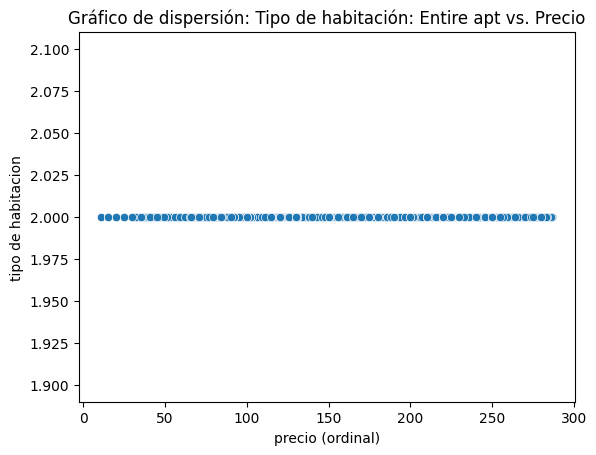

In [50]:


sns.scatterplot(x='price_x', y='room_type_ordinal', data=df_combinado)  # O price_numeric
plt.xlabel('precio (ordinal)')
plt.ylabel('tipo de habitacion')
plt.title('Gráfico de dispersión: Tipo de habitación: Entire apt vs. Precio')
plt.show()

price vs private room

In [51]:
private_room

,room_type,price
5,Private room,130
14,Private room,111
15,Private room,160
16,Private room,130
17,Private room,169
...,...,...
30633,Private room,85
30635,Private room,89
30637,Private room,100
30638,Private room,111


In [ ]:
# Definir los intervalos y sus límites de acuerdo a lo que se ha calculado



intervalos = {
    '0-166.4': (0, 166.4),
    '166.5-332': (166.5, 332),
    '333-499.4': (333, 499.4),
    '499.5-665': (499.5, 665),
    '666-832.4': (666, 832.4),
    '832.5-999': (832.5, 999)
}

In [53]:
# Función para asignar intervalos
def asignar_intervalo(precio):
    for intervalo, (limite_inferior, limite_superior) in intervalos.items():
        if limite_inferior <= precio <= limite_superior:
            return intervalo
    return None  # Si el precio no cae en ningún intervalo

# Aplicar la función a la columna price en private room
private_room['price_interval'] = private_room['price'].apply(asignar_intervalo)

In [54]:
print(private_room[['price', 'price_interval']].head(6))

    price price_interval
5     130        0-166.4
14    111        0-166.4
15    160        0-166.4
16    130        0-166.4
17    169      166.5-332
19    130        0-166.4


In [55]:
# Combinar entire_home_apt con df_intervalos_completos
df_combinado2 = private_room.merge(df_intervalos_completos, left_on='price_interval', right_on='price', how='left')
df_combinado2

,room_type,price_x,price_interval,price_y,price_numeric
0,Private room,130,0-166.4,0-166.4,150
1,Private room,111,0-166.4,0-166.4,150
2,Private room,160,0-166.4,0-166.4,150
3,Private room,130,0-166.4,0-166.4,150
4,Private room,169,166.5-332,166.5-332,300
...,...,...,...,...,...
10036,Private room,85,0-166.4,0-166.4,150
10037,Private room,89,0-166.4,0-166.4,150
10038,Private room,100,0-166.4,0-166.4,150
10039,Private room,111,0-166.4,0-166.4,150


In [69]:
ordinal_mapping = {'private_room': 2}  # Define tu propio orden
df_combinado2['room_type_ordinal'] = df_combinado2['room_type'].map(ordinal_mapping)
df_combinado2



,room_type,price_x,price_interval,price_y,price_numeric,room_type_ordinal
0,Private room,130,0-166.4,0-166.4,150,NaN
1,Private room,111,0-166.4,0-166.4,150,NaN
2,Private room,160,0-166.4,0-166.4,150,NaN
3,Private room,130,0-166.4,0-166.4,150,NaN
4,Private room,169,166.5-332,166.5-332,300,NaN
...,...,...,...,...,...,...
10036,Private room,85,0-166.4,0-166.4,150,NaN
10037,Private room,89,0-166.4,0-166.4,150,NaN
10038,Private room,100,0-166.4,0-166.4,150,NaN
10039,Private room,111,0-166.4,0-166.4,150,NaN


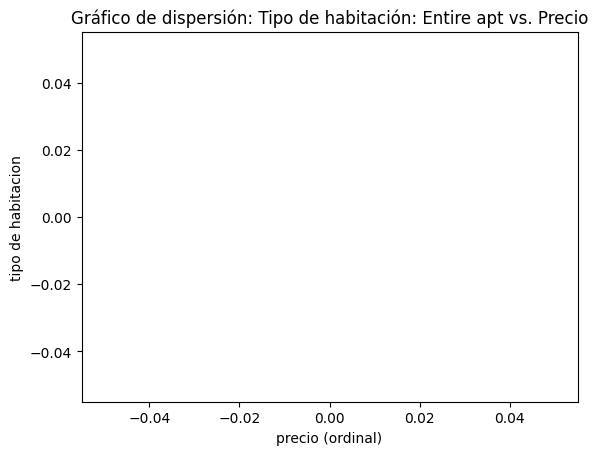

In [60]:
sns.scatterplot(x='price_x', y='room_type_ordinal', data=df_combinado2)  # O price_numeric
plt.xlabel('precio (ordinal)')
plt.ylabel('tipo de habitacion')
plt.title('Gráfico de dispersión: Tipo de habitación: Entire apt vs. Precio')
plt.show()

price vs shared room

price vs hotel room 

price vs host_acceptance_rate

In [70]:
#Conveetimos la columna de host_acceptance_rate a decimales
# Función para convertir porcentajes a decimales
def convertir_a_decimal(valor):
    if isinstance(valor, str) and valor.endswith('%'):  # Verifica si es un porcentaje
        return float(valor.strip('%')) / 100  # Elimina el % y divide entre 100
    return float(valor)  # Si no es un porcentaje, convierte a float directamente

# Aplicar la función a la columna
df['host_acceptance_rate'] = df['host_acceptance_rate'].apply(convertir_a_decimal)

print("\nDataFrame transformado:")
print(df)


DataFrame transformado:
       Unnamed: 0 last_scraped source  \
0               0     12/09/24     --   
1               1     12/09/24     --   
2               2     11/09/24     --   
3               3     11/09/24     --   
4               4     11/09/24     --   
...           ...          ...    ...   
30638       30638     12/09/24     --   
30639       30639     12/09/24     --   
30640       30640     12/09/24     --   
30641       30641     12/09/24     --   
30642       30642     12/09/24     --   

                                                    name  \
0                             Inishowen Artists' Retreat   
1      Cottage within the grounds Rathmullan House Hotel   
2                                          Melmore Crest   
3                                          Fairway Haven   
4                         Spacious Dublin City Apartment   
...                                                  ...   
30638                                  ARAN SOUTH ROOM 2   
30

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30643 entries, 0 to 30642
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      30643 non-null  int64  
 1   last_scraped                    30643 non-null  object 
 2   source                          30643 non-null  object 
 3   name                            30643 non-null  object 
 4   description                     30643 non-null  object 
 5   host_name                       30643 non-null  object 
 6   host_since                      30643 non-null  object 
 7   host_location                   30643 non-null  object 
 8   host_about                      30643 non-null  object 
 9   host_response_time              30643 non-null  object 
 10  host_response_rate              30643 non-null  object 
 11  host_acceptance_rate            30643 non-null  float64
 12  host_is_superhost               

In [72]:
# Eliminamos el símbolo "$" y convertimos a números usando una función lambda ela columna de price
df['price'] = df['price'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
df.head(5)

,Unnamed: 0,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,12/09/24,--,Inishowen Artists' Retreat,A beautiful 1800s Irish cottage with a working...,Andy,21/11/18,"Trenbane, Ireland","Ageing hippy, trained as aerospace engineer wh...",within an hour,...,2.0,4.98,4.95,4.95,4.95,4.98,4.90,4.98,1.0,2.35
1,1,12/09/24,--,Cottage within the grounds Rathmullan House Hotel,Your best option to stay if you want to visit ...,Travelnest,05/01/22,"Mexico City, Mexico","Hello, we are the Travelnest Team and we offer...",within an hour,...,0.0,5.00,5.00,4.95,4.95,5.00,4.85,4.90,1.8,0.84
2,2,11/09/24,--,Melmore Crest,Welcome to your secluded luxury retreat by the...,Kai,10/12/15,"Gremersdorf, Germany",Hello! I am the owner of the house but live in...,within a few hours,...,1.0,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.0,1.32
3,3,11/09/24,--,Fairway Haven,Fairway Haven is located close to Dunfanaghy G...,Jack,01/07/23,"Lifford, Ireland","I am a social person, who likes to provide the...",within an hour,...,1.0,4.83,5.00,4.50,4.83,5.00,4.67,5.00,1.0,0.44
4,4,11/09/24,--,Spacious Dublin City Apartment,Presenting our extremely spacious and comforta...,Denis,29/03/17,"Mexico City, Mexico","I am a social person, who likes to provide the...",within a day,...,0.0,4.90,4.90,4.80,5.00,5.00,4.90,4.70,1.0,1.10


In [73]:
#Reemplazar valores nulos
df['price'].fillna(df['price'].mean(), inplace=True)
df

/var/folders/cz/7wvs0p453l9_tw6cq3z5z51h0000gn/T/ipykernel_18996/3370486266.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)


,Unnamed: 0,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,12/09/24,--,Inishowen Artists' Retreat,A beautiful 1800s Irish cottage with a working...,Andy,21/11/18,"Trenbane, Ireland","Ageing hippy, trained as aerospace engineer wh...",within an hour,...,2.0,4.98,4.95,4.95,4.95,4.98,4.90,4.98,1.0,2.35
1,1,12/09/24,--,Cottage within the grounds Rathmullan House Hotel,Your best option to stay if you want to visit ...,Travelnest,05/01/22,"Mexico City, Mexico","Hello, we are the Travelnest Team and we offer...",within an hour,...,0.0,5.00,5.00,4.95,4.95,5.00,4.85,4.90,1.8,0.84
2,2,11/09/24,--,Melmore Crest,Welcome to your secluded luxury retreat by the...,Kai,10/12/15,"Gremersdorf, Germany",Hello! I am the owner of the house but live in...,within a few hours,...,1.0,5.00,5.00,5.00,5.00,5.00,4.67,5.00,1.0,1.32
3,3,11/09/24,--,Fairway Haven,Fairway Haven is located close to Dunfanaghy G...,Jack,01/07/23,"Lifford, Ireland","I am a social person, who likes to provide the...",within an hour,...,1.0,4.83,5.00,4.50,4.83,5.00,4.67,5.00,1.0,0.44
4,4,11/09/24,--,Spacious Dublin City Apartment,Presenting our extremely spacious and comforta...,Denis,29/03/17,"Mexico City, Mexico","I am a social person, who likes to provide the...",within a day,...,0.0,4.90,4.90,4.80,5.00,5.00,4.90,4.70,1.0,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30638,30638,12/09/24,--,ARAN SOUTH ROOM 2,ARAN SOUTH ROOMS with their own private entran...,Maria,08/01/14,"County Galway, Ireland","I am a social person, who likes to provide the...",within a few hours,...,7.0,4.92,4.87,4.92,4.95,4.97,4.97,4.82,3.0,0.51
30639,30639,12/09/24,--,In the heartbeat of Connemara,Enjoy the peace and quiet while taking in the ...,Linda Peadar,10/03/24,"Mexico City, Mexico","I am a social person, who likes to provide the...",within an hour,...,6.0,5.00,5.00,5.00,5.00,5.00,4.83,4.83,1.0,2.17
30640,30640,12/09/24,--,House near Salthill,Your best option to stay if you want to visit ...,Michaela,01/07/13,"Dublin, Ireland",Things I can't live without....\r\n1) Love\r\...,within a day,...,0.0,4.90,4.90,4.80,5.00,5.00,4.90,4.70,1.0,1.10
30641,30641,12/09/24,--,Home in Galway,Newly renovated cosy 3 bedroom house available...,Cora,22/04/23,"Clarinbridge, Ireland","I am a social person, who likes to provide the...",within an hour,...,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0,0.57


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

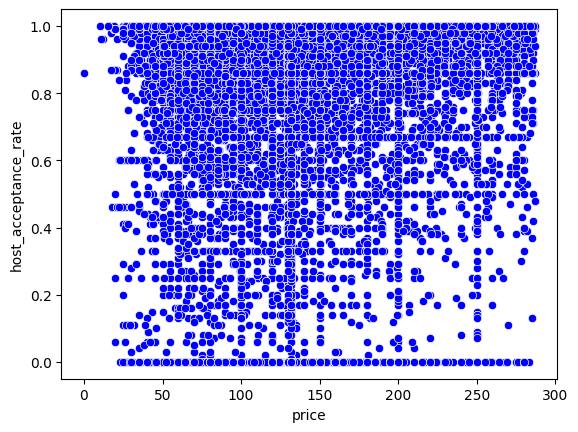

In [74]:
sns.scatterplot(x="price", y="host_acceptance_rate", color="blue", data=df)


In [75]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep= df[['price']]
Var_Dep= df['host_acceptance_rate']

In [76]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [77]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(Vars_Indep, Var_Dep)

LinearRegression()

In [78]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.00010794]),
 'rank_': 1,
 'singular_': array([8483.76648728]),
 'intercept_': 0.8482667662533849}

In [64]:
#Predecimos los valores de total de accidentes a partir de la variable alcohol
#y_pred model.coef_
y_pred= model.predict(X=df[["price"]])
y_pred

array([0.89545595, 0.85654701, 0.89545595, ..., 0.89545595, 0.89545595,
       0.89545595])

In [65]:
df.insert(0, "Predicciones_1", y_pred)
df

,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,1.0,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70
1,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,...,1.0,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41
2,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,...,2.0,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31
3,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,...,1.0,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83
4,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,...,1.0,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/67472234,HostPal,...,2.0,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70
26578,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70
26579,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70
26580,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

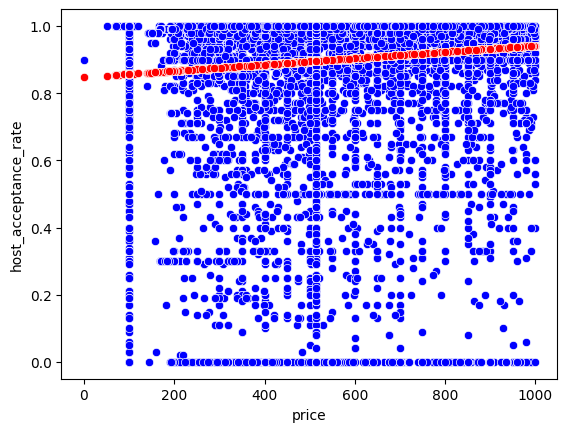

In [66]:
#Visualizamos la comparativa grafica entre el total real y el total predecido
sns.scatterplot(x="price", y="host_acceptance_rate", color="blue", data=df)
sns.scatterplot(x="price", y="Predicciones_1", color="red", data=df)

In [67]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.008205710507447339

In [68]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Corre1=np.sqrt(coef_Deter)
coef_Corre1

0.09058537689631445

price vs host_is_superhost

In [69]:
#Convertimos la columna de host:is_superhost a numerica usando un mapeo
df["host_is_superhost_numeros"] = df["host_is_superhost"].replace({'f': 0, 't': 1})
df

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\3323019266.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["host_is_superhost_numeros"] = df["host_is_superhost"].replace({'f': 0, 't': 1})


,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros
0,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0
1,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1
2,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1
3,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1
4,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/67472234,HostPal,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1
26578,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26579,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26580,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,Luis Angel,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Predicciones_1               26582 non-null  float64
 1   Unnamed: 0                   26582 non-null  int64  
 2   listing_url                  26582 non-null  object 
 3   last_scraped                 26582 non-null  object 
 4   source                       26582 non-null  object 
 5   name                         26582 non-null  object 
 6   neighborhood_overview        26582 non-null  object 
 7   picture_url                  26582 non-null  object 
 8   host_url                     26582 non-null  object 
 9   host_name                    26582 non-null  object 
 10  host_since                   26582 non-null  object 
 11  host_location                26582 non-null  object 
 12  host_about                   26582 non-null  object 
 13  host_response_ti

<Axes: xlabel='price', ylabel='host_is_superhost_numeros'>

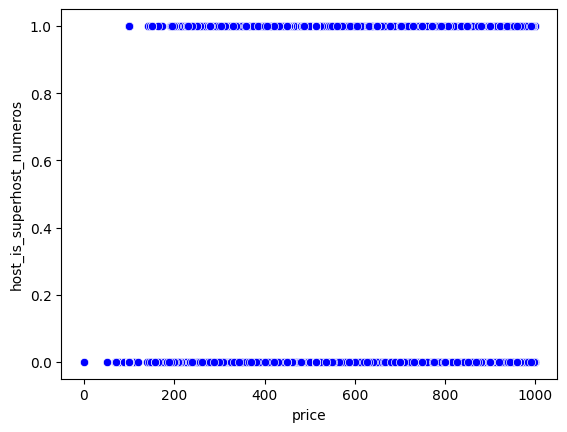

In [72]:
sns.scatterplot(x="price", y="host_is_superhost_numeros", color="blue", data=df)

accommodates vs bathrooms

<Axes: xlabel='accommodates', ylabel='bathrooms'>

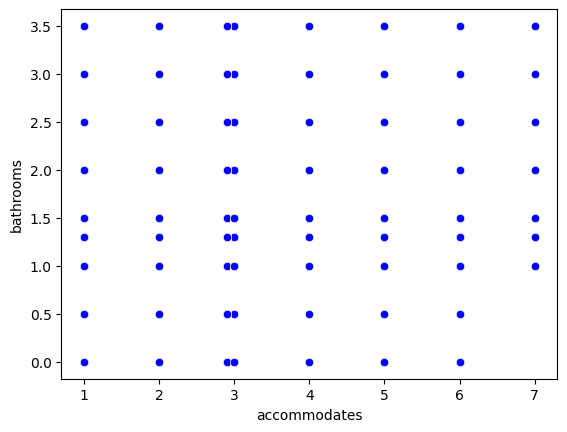

In [73]:
sns.scatterplot(x="accommodates", y="bathrooms", color="blue", data=df)

In [74]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['bathrooms']

In [75]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [76]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(Vars_Indep, Var_Dep)

LinearRegression()

In [78]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.15200309]),
 'rank_': 1,
 'singular_': array([234.55913891]),
 'intercept_': 0.8694462923286311}

In [79]:
#Predecimos los valores de total de accidentes a partir de la variable alcohol
#y_pred model.coef_
y_pred= model.predict(X=df[["accommodates"]])
y_pred

array([1.17345247, 1.31025525, 1.47745865, ..., 1.17345247, 1.17345247,
       1.17345247])

In [80]:
df.insert(0, "Predicciones_2", y_pred)
df

,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros
0,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0
1,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1
2,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1
3,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1
4,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,https://www.airbnb.com/users/show/67472234,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1
26578,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26579,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26580,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/596009321,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0


<Axes: xlabel='accommodates', ylabel='bathrooms'>

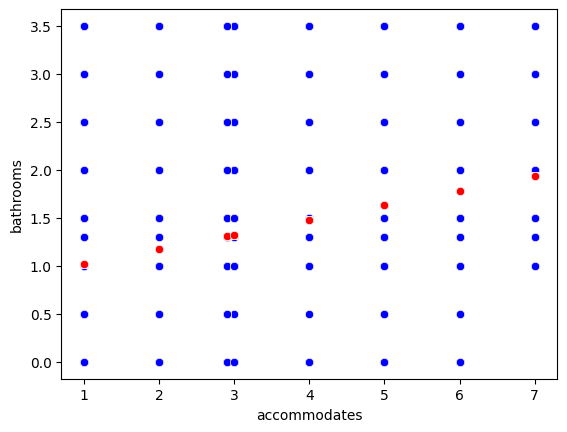

In [81]:
#Visualizamos la comparativa grafica entre el total real y el total predecido
sns.scatterplot(x="accommodates", y="bathrooms", color="blue", data=df)
sns.scatterplot(x="accommodates", y="Predicciones_2", color="red", data=df)

In [82]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.15635537821282386

In [83]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Corre1=np.sqrt(coef_Deter)
coef_Corre1

0.3954179791218703

Price vs review_scores_cleanliness

<Axes: xlabel='price', ylabel='review_scores_cleanliness'>

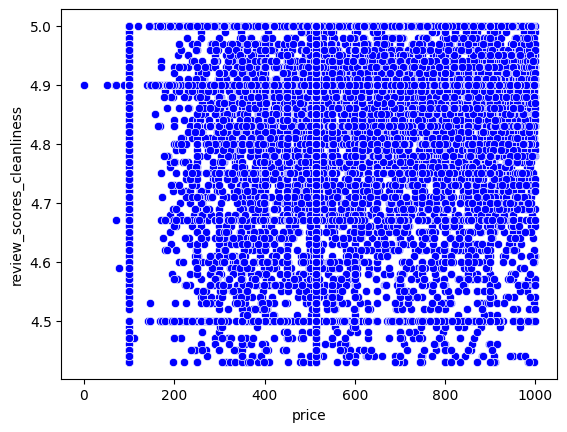

In [84]:
sns.scatterplot(x="price", y="review_scores_cleanliness", color="blue", data=df)

In [85]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep= df[['price']]
Var_Dep= df['review_scores_cleanliness']

In [86]:
#Se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [87]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(Vars_Indep, Var_Dep)

LinearRegression()

In [88]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-3.32142059e-05]),
 'rank_': 1,
 'singular_': array([34866.12857706]),
 'intercept_': 4.8723422356785715}

In [89]:
#Predecimos los valores de total de accidentes a partir de la variable alcohol
#y_pred model.coef_
y_pred= model.predict(X=df[["price"]])
y_pred

array([4.85530171, 4.86902082, 4.85530171, ..., 4.85530171, 4.85530171,
       4.85530171])

In [90]:
df.insert(0, "Predicciones_3", y_pred)
df

,Predicciones_3,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,...,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros
0,4.855302,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,...,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0
1,4.869021,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,...,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1
2,4.855302,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,...,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1
3,4.855302,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1
4,4.855302,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,...,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.856134,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,...,1.0,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1
26578,4.855302,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26579,4.855302,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0
26580,4.855302,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,1.0,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0


<Axes: xlabel='price', ylabel='review_scores_cleanliness'>

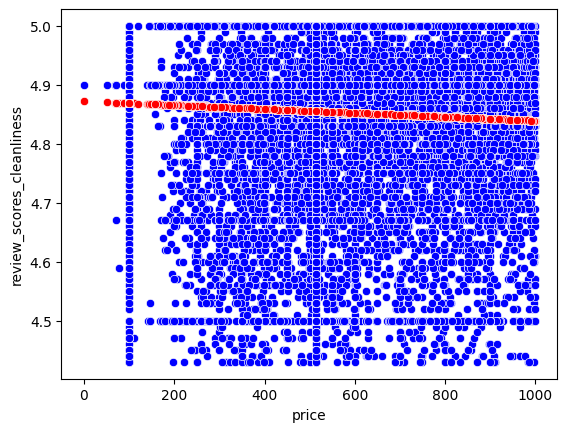

In [92]:
#Visualizamos la comparativa grafica entre el total real y el total predecido
sns.scatterplot(x="price", y="review_scores_cleanliness", color="blue", data=df)
sns.scatterplot(x="price", y="Predicciones_3", color="red", data=df)

In [93]:
#Corroboramos cual es el coeficiente de determinacion de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0028592360690593566

In [94]:
#corroboramos cual es el coeficiente de correlacion de nuestro modelo
coef_Corre1=np.sqrt(coef_Deter)
coef_Corre1

0.053471825002138804

price vs host_identity_verified

In [97]:
#Convertimos la columna de host:is_superhost a numerica usando un mapeo
df["host_identity_verified_numerica"] = df["host_identity_verified"].replace({'f': 0, 't': 1})
df

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\3266723597.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["host_identity_verified_numerica"] = df["host_identity_verified"].replace({'f': 0, 't': 1})


,Predicciones_3,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,...,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros,host_identity_verified_numerica
0,4.855302,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,...,7,363,0.0,4.80,4.90,4.90,4.90,1.70,0,1
1,4.869021,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,...,365,325,64.0,4.58,4.70,4.78,4.98,0.41,1,1
2,4.855302,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,...,30,325,49.0,4.90,4.75,4.92,4.98,0.31,1,1
3,4.855302,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,180,257,127.0,4.91,4.96,4.98,4.96,0.83,1,1
4,4.855302,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,...,365,275,11.0,4.91,5.00,4.73,4.91,0.11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.856134,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,...,45,365,0.0,4.80,4.90,4.90,4.90,1.70,1,1
26578,4.855302,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1
26579,4.855302,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1
26580,4.855302,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,365,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1


<Axes: xlabel='price', ylabel='host_identity_verified'>

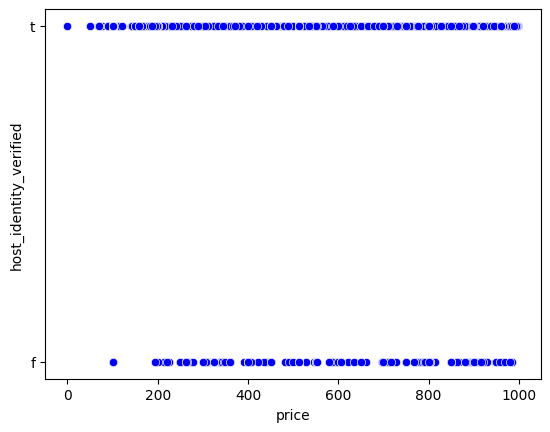

In [98]:
sns.scatterplot(x="price", y="host_identity_verified", color="blue", data=df)

price vs instant bookable

In [99]:
#Convertimos la columna de host:is_superhost a numerica usando un mapeo
df["instant_bookable_numerico"] = df["instant_bookable"].replace({'f': 0, 't': 1})
df

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\207980670.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["instant_bookable_numerico"] = df["instant_bookable"].replace({'f': 0, 't': 1})


,Predicciones_3,Predicciones_2,Predicciones_1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,...,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month,host_is_superhost_numeros,host_identity_verified_numerica,instant_bookable_numerico
0,4.855302,1.173452,0.895456,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,...,363,0.0,4.80,4.90,4.90,4.90,1.70,0,1,0
1,4.869021,1.310255,0.856547,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,...,325,64.0,4.58,4.70,4.78,4.98,0.41,1,1,0
2,4.855302,1.477459,0.895456,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,...,325,49.0,4.90,4.75,4.92,4.98,0.31,1,1,0
3,4.855302,1.173452,0.895456,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,...,257,127.0,4.91,4.96,4.98,4.96,0.83,1,1,0
4,4.855302,1.173452,0.895456,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,...,275,11.0,4.91,5.00,4.73,4.91,0.11,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,4.856134,1.477459,0.893096,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,"Welcome to Lomas de Bezares, a neighborhood kn...",https://a0.muscache.com/pictures/prohost-api/H...,...,365,0.0,4.80,4.90,4.90,4.90,1.70,1,1,1
26578,4.855302,1.173452,0.895456,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1,1
26579,4.855302,1.173452,0.895456,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,city scrape,Suite King | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1,1
26580,4.855302,1.173452,0.895456,26580,https://www.airbnb.com/rooms/1252218347521498445,2024-09-25,city scrape,Suite Queen | District Polanco,The neighborhood is very nice,https://a0.muscache.com/pictures/miso/Hosting-...,...,177,0.0,4.80,4.90,4.90,4.90,1.70,0,1,1


<Axes: xlabel='price', ylabel='instant_bookable_numerico'>

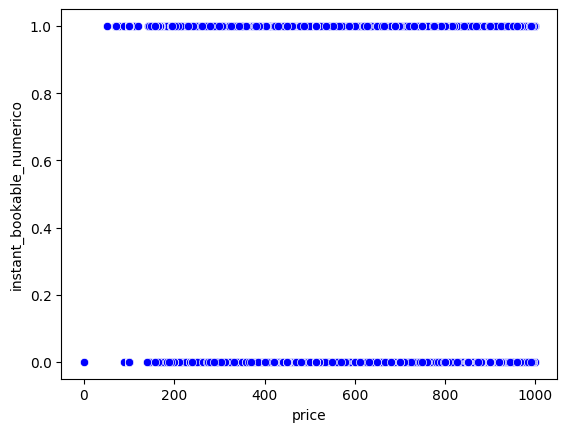

In [100]:
sns.scatterplot(x="price", y="instant_bookable_numerico", color="blue", data=df)

Price vs property_type

In [101]:
#Nuevo dataframe
df_3 = df[['property_type', 'price']].copy()
df_3

,property_type,price
0,Entire villa,513.049381
1,Entire home,100.000000
2,Entire rental unit,513.049381
3,Entire rental unit,513.049381
4,Entire loft,513.049381
...,...,...
26577,Private room in guesthouse,488.000000
26578,Room in hotel,513.049381
26579,Room in hotel,513.049381
26580,Room in hotel,513.049381


In [102]:
# Eliminar el símbolo "$" y convertir a número usando una función lambda
df_3['price'] = df_3['price'].apply(lambda x: pd.to_numeric(str(x).replace('$', ''), errors='coerce'))
df_3

,property_type,price
0,Entire villa,513.049381
1,Entire home,100.000000
2,Entire rental unit,513.049381
3,Entire rental unit,513.049381
4,Entire loft,513.049381
...,...,...
26577,Private room in guesthouse,488.000000
26578,Room in hotel,513.049381
26579,Room in hotel,513.049381
26580,Room in hotel,513.049381


In [103]:
#Reemplazar valores nulos
df_3['price'].fillna(df_3['price'].mean(), inplace=True)
df_3

C:\Users\elias\AppData\Local\Temp\ipykernel_18440\3811224092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3['price'].fillna(df_3['price'].mean(), inplace=True)


,property_type,price
0,Entire villa,513.049381
1,Entire home,100.000000
2,Entire rental unit,513.049381
3,Entire rental unit,513.049381
4,Entire loft,513.049381
...,...,...
26577,Private room in guesthouse,488.000000
26578,Room in hotel,513.049381
26579,Room in hotel,513.049381
26580,Room in hotel,513.049381


In [104]:
#Convertir a numeros enteros
df_3['price'] = df_3['price'].astype(int)
df_3

,property_type,price
0,Entire villa,513
1,Entire home,100
2,Entire rental unit,513
3,Entire rental unit,513
4,Entire loft,513
...,...,...
26577,Private room in guesthouse,488
26578,Room in hotel,513
26579,Room in hotel,513
26580,Room in hotel,513


In [108]:
#Obtengo un ánalisis univariado de una variable en específico
table3 = freq_tbl(df_3['property_type'])
table3

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,9971,0.375103,0.375103
1,Entire condo,3423,0.128771,0.503875
2,Private room in rental unit,3034,0.114137,0.618012
3,Private room in home,2266,0.085246,0.703258
4,Entire loft,1515,0.056993,0.760251
...,...,...,...,...
87,Private room in floor,1,0.000038,0.999850
88,Earthen home,1,0.000038,0.999887
89,Entire in-law,1,0.000038,0.999925
90,Shared room in dorm,1,0.000038,0.999962


In [112]:
#Elimino las columnas "percentage" y "cumulative_perc" para trabajar con las frecuencias
table3_2 = table3.drop(['percentage', 'cumulative_perc'], axis=1)
table3_2

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515
...,...,...
87,Private room in floor,1
88,Earthen home,1
89,Entire in-law,1
90,Shared room in dorm,1


In [119]:
#Obtengo un filtro de los valores más reelevantes de las variables categórica seleccionada
Filtro3 = table3_2[table3_2['frequency']>1000]
Filtro3

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515


In [123]:
#Ajusto el índice de mi dataframe
Filtro_index3 = Filtro3.set_index('property_type')
Filtro_index3

,frequency
property_type,
Entire rental unit,9971
Entire condo,3423
Private room in rental unit,3034
Private room in home,2266
Entire loft,1515


In [125]:
table3_3 = Filtro_index3.drop(['frequency'], axis=1)
table3_3

""
property_type
Entire rental unit
Entire condo
Private room in rental unit
Private room in home
Entire loft


In [129]:
#Creamos un dataframe para cada valor de room type
Entire_rental_unit = df_3[df_3['property_type'] == 'Entire rental unit'].copy()
Entire_condo = df_3[df_3['property_type'] == 'Entire condo'].copy()
Private_room_in_rental_unit = df_3[df_3['property_type'] == 'Private room in rental unit'].copy()
Private_room_in_home = df_3[df_3['property_type'] == 'Private room in home'].copy()
Entire_loft= df_3[df_3['property_type'] == 'Entire loft'].copy()

In [131]:
Entire_condo

,property_type,price
33,Entire condo,991
44,Entire condo,513
64,Entire condo,513
70,Entire condo,513
102,Entire condo,513
...,...,...
26409,Entire condo,513
26434,Entire condo,513
26451,Entire condo,513
26486,Entire condo,513


In [132]:
Private_room_in_rental_unit

,property_type,price
7,Private room in rental unit,335
13,Private room in rental unit,526
16,Private room in rental unit,406
30,Private room in rental unit,406
35,Private room in rental unit,344
...,...,...
26554,Private room in rental unit,523
26564,Private room in rental unit,420
26568,Private room in rental unit,366
26569,Private room in rental unit,381


In [133]:
Private_room_in_home 

,property_type,price
10,Private room in home,384
15,Private room in home,750
23,Private room in home,100
29,Private room in home,500
56,Private room in home,348
...,...,...
26541,Private room in home,280
26545,Private room in home,231
26558,Private room in home,960
26567,Private room in home,480


In [134]:
Entire_loft

,property_type,price
4,Entire loft,513
17,Entire loft,513
19,Entire loft,100
42,Entire loft,800
45,Entire loft,513
...,...,...
26254,Entire loft,513
26395,Entire loft,513
26438,Entire loft,513
26518,Entire loft,513


In [130]:
Entire_rental_unit

,property_type,price
2,Entire rental unit,513
3,Entire rental unit,513
18,Entire rental unit,100
20,Entire rental unit,513
21,Entire rental unit,800
...,...,...
26571,Entire rental unit,513
26572,Entire rental unit,700
26574,Entire rental unit,513
26575,Entire rental unit,513
